# Business Objectives :

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The company wants to know                         1.Which variables are significant in predicting the price of a house, and
        2.How well those variables describe the price of a house.

### Problem Description :
Model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Solution : 

#### Importing Necessary Libraries

In [262]:
import pandas as pd # data processing, CSV file I/O.
import numpy as np # linear algebra

# For Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For Warnings
import warnings

In [263]:
# Linear Regression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [264]:
# Import Ridge regression module, Grid Serach CV and KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Importing Lasso module
from sklearn.linear_model import Lasso

#### Setting configurations

In [265]:
pd.set_option('display.max_columns', None) # Display all  columns of dataframe
warnings.filterwarnings("ignore")          # Supress warnings

#### Reading Dataset

In [266]:
housing_data = pd.read_csv('E://UpgradDataFiles/train.csv')
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Metadata of the Dataframe:

In [267]:
print("Shape of dataframe is "+str(housing_data.shape)+"\n")
print("Information about dataframe: ")
housing_data.info()

Shape of dataframe is (1460, 81)

Information about dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
R

In [268]:
housing_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Data Understanding

In [269]:
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


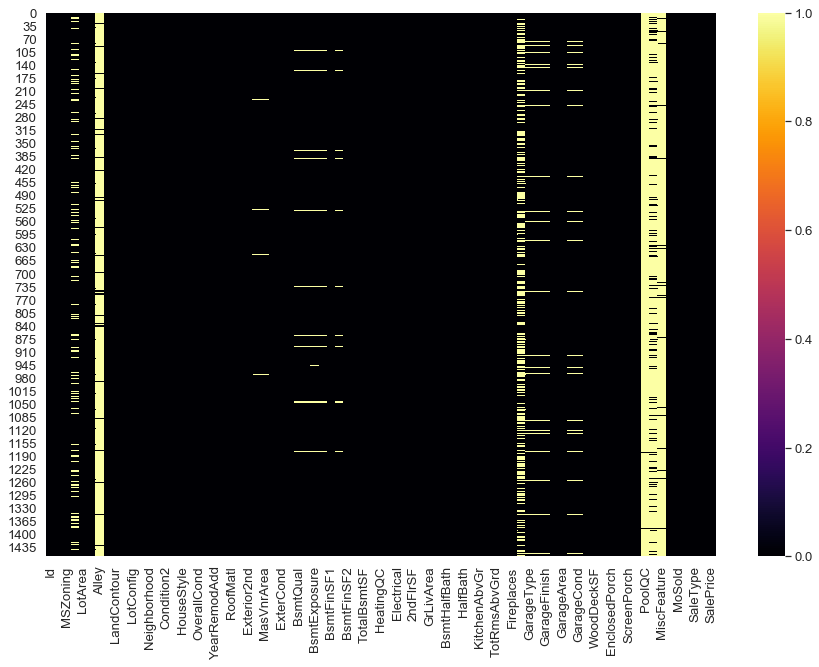

In [270]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(housing_data.isna(),cmap='inferno')

Some of the columns have null values

#### Scatter plot  for numerical columns
To understand even at all there is any linear relationship among the variable

<Figure size 720x360 with 0 Axes>

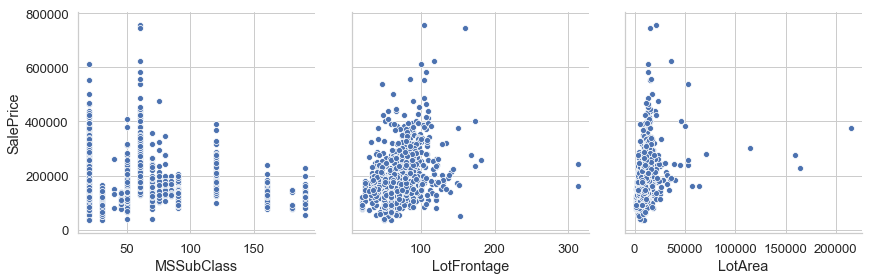

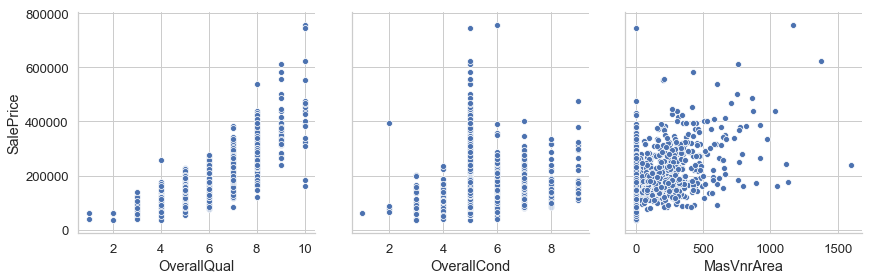

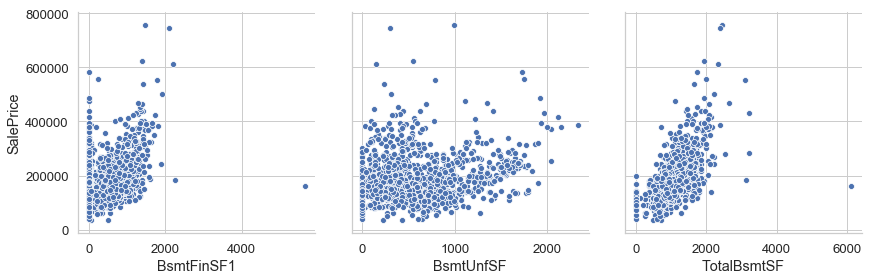

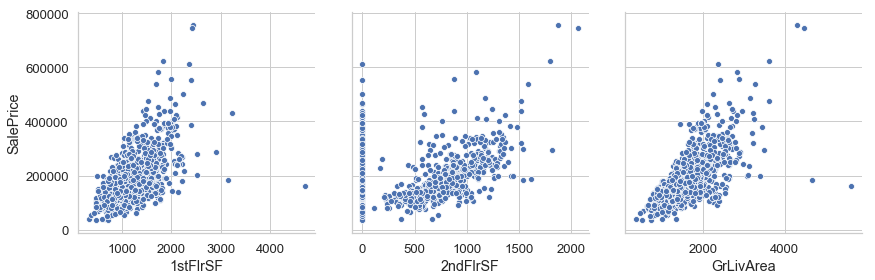

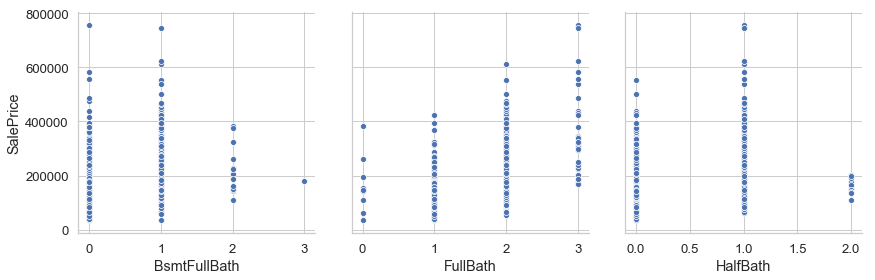

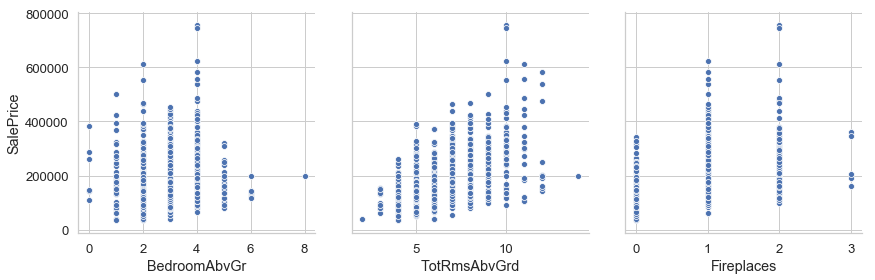

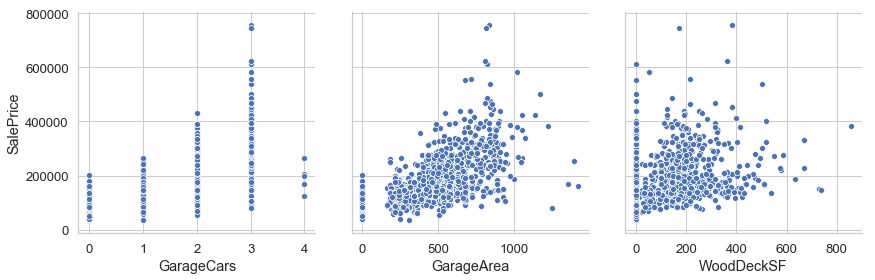

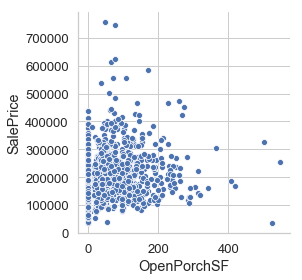

In [271]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(housing_data, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['OpenPorchSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

#### Box plot  for numerical columns
To understand if there are outliers in the dataset

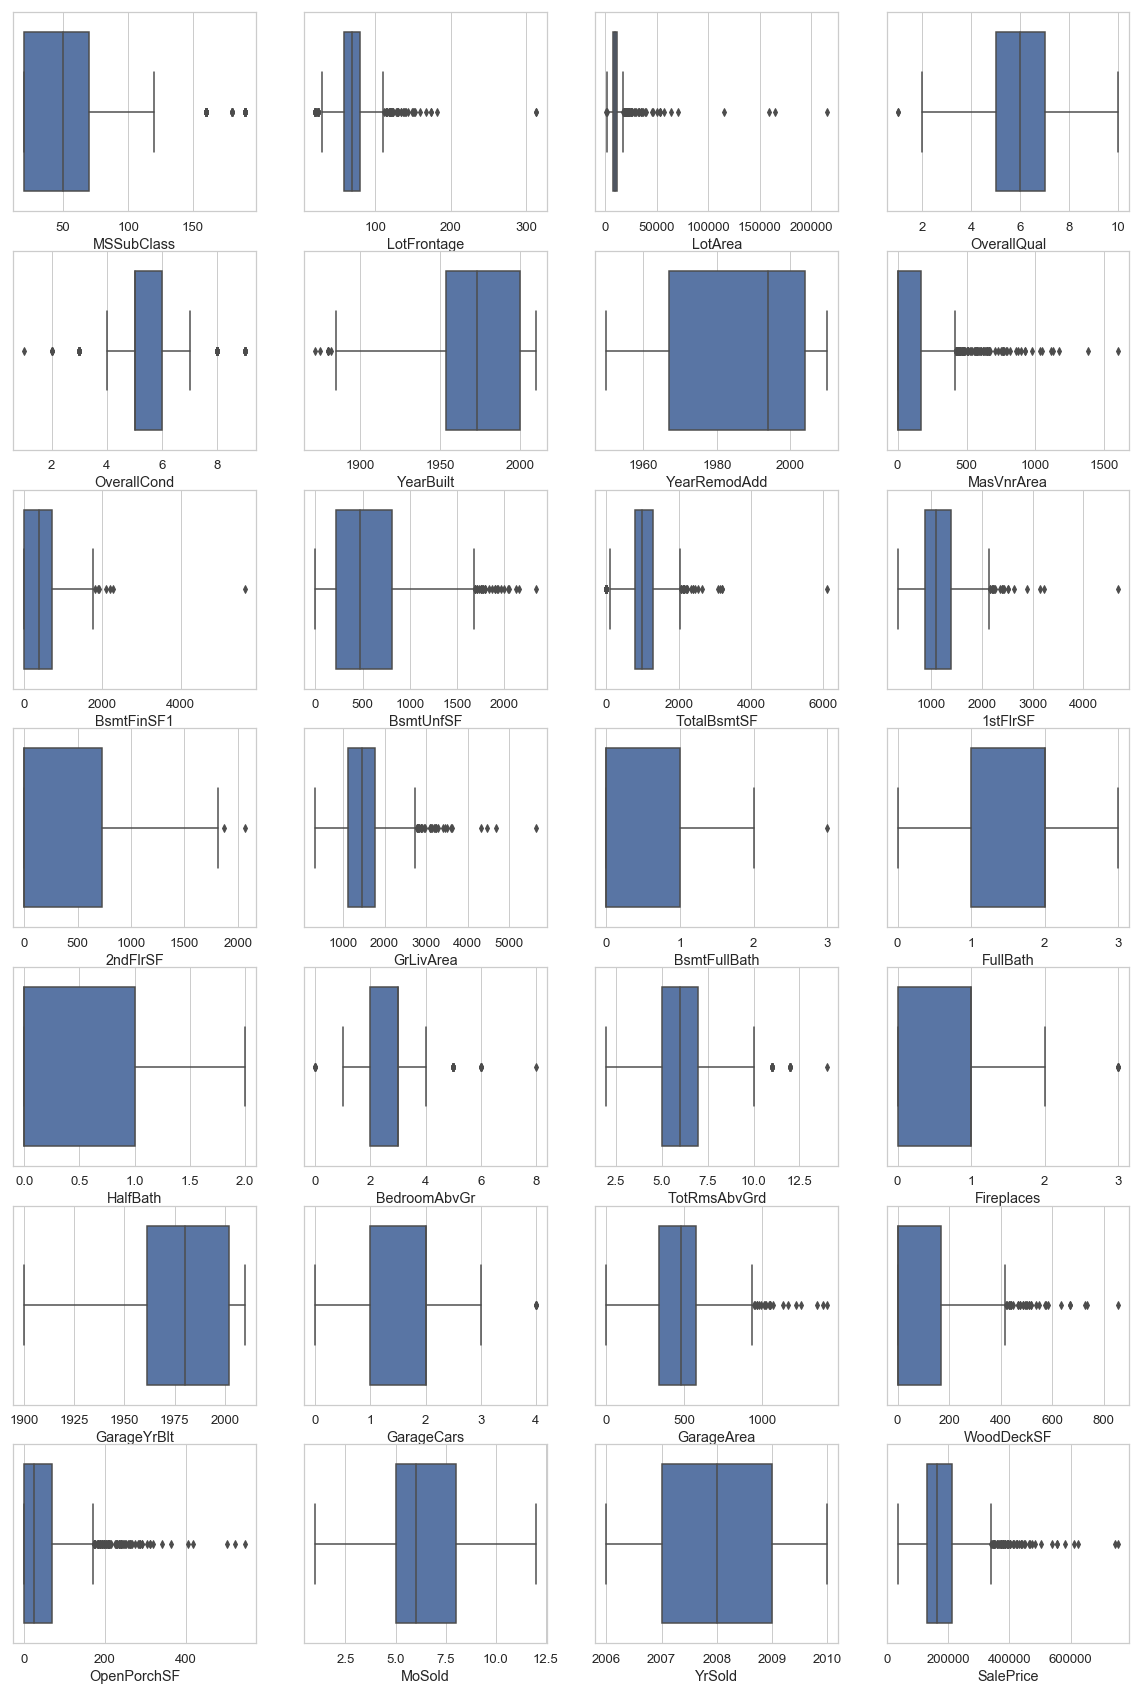

In [272]:
# Numeric columns list
numeric_cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice']

# Plotting the spread of the numeric columns
plt.figure(figsize=(20,30))
for i in enumerate(numeric_cols):
    plt.subplot(7,4,i[0]+1)
    sns.boxplot(x=i[1], data=housing_data)

We can see that there are outliers in few numeric columns.

#### Heatmap for the data
To identify if there are any higly correlated columns

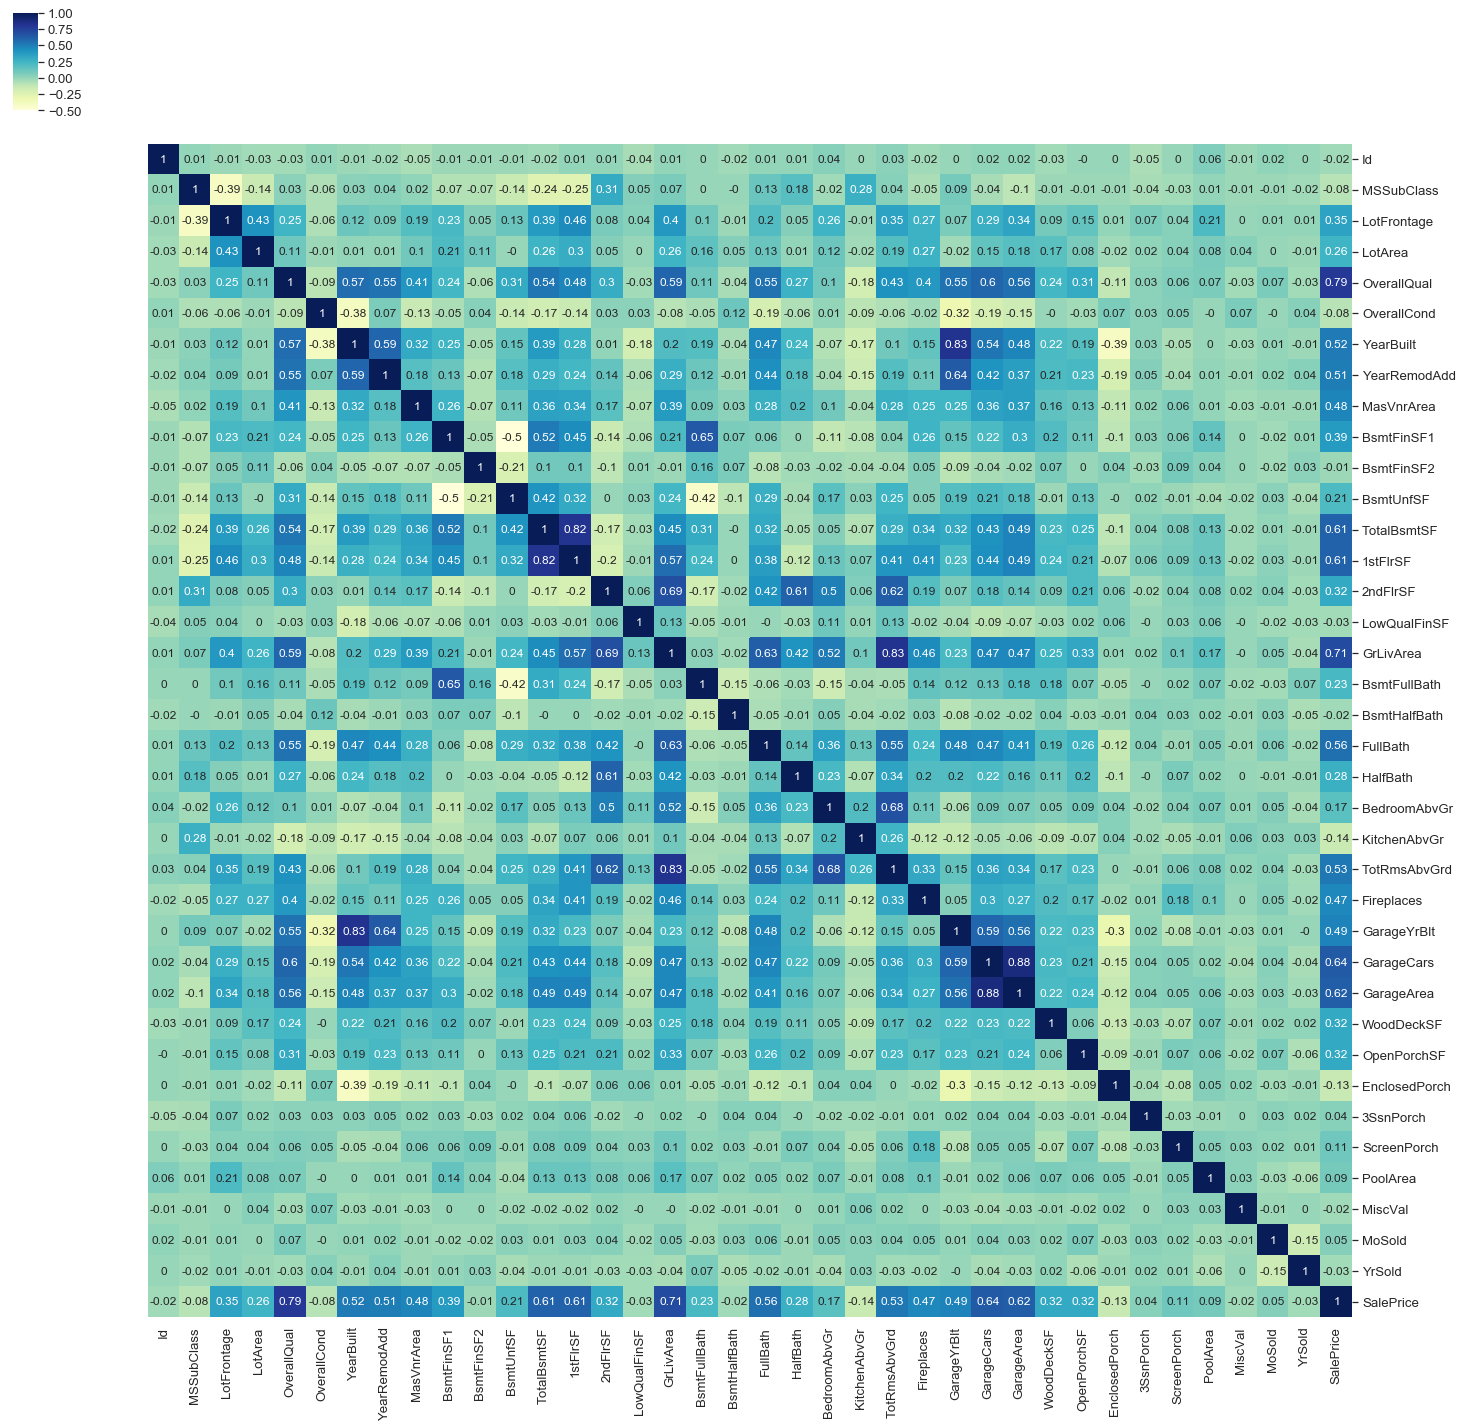

In [273]:
# Check the correlation of numerical columns
data_correlation = housing_data.corr().round(2)
sns.set(font_scale=1.2)
sns.clustermap(data_correlation,annot=True,annot_kws={'size': 12}
               ,figsize=(24,24)
               ,col_cluster=False,row_cluster=False,cmap="YlGnBu")

plt.show()

#### There is high correlation between GarageArea and GarageCars
#### There is high correlation between TotalBsmtSF and 1stFlrSF

### Data Preparation

In [274]:
# Removing the columns having null for more than 50% of the records

percent_missing = housing_data.isnull().sum() * 100 / len(housing_data)
missing_value_loan = pd.DataFrame({'column_name': housing_data.columns,
                                 'percent_missing': percent_missing})
columns_with_null = list(missing_value_loan[percent_missing >=50].column_name)

housing_data  = housing_data.drop(columns_with_null,axis=1)
housing_data.shape
# print(columns_with_null)

(1460, 77)

#### Columns having unique values, distinct values, low cardinality are not useful in this case so dropping them will be a better step for accuracy -

In [275]:
# Drop the following columns that have more than 85% values associated to a specific value (low cardinality)


def getHighNumericalValueCounts():
    column = []
    housing_columns = housing_data.columns
    for col in (housing_columns):
        if(housing_data[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
housing_data.drop(columnsToBeRemoved, axis = 1, inplace = True)



# We will also drop MoSold they irrelevant for the modelling

housing_data.drop(['MoSold'], axis = 1, inplace = True)

housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,NaN,Attchd,2003.0,RFn,2,548,0,61,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,2008,Normal,250000


In [276]:
# Creating dataframe, containing column name and unique values for each column

housing_with_distinct_values = pd.DataFrame({'columnName':housing_data.columns,'uniqueValues':housing_data.nunique()}).sort_values('uniqueValues',ascending=True)
housing_with_distinct_values

,columnName,uniqueValues
GarageFinish,GarageFinish,3
HalfBath,HalfBath,3
FullBath,FullBath,4
BsmtExposure,BsmtExposure,4
MasVnrType,MasVnrType,4
BsmtFullBath,BsmtFullBath,4
ExterQual,ExterQual,4
KitchenQual,KitchenQual,4
BsmtQual,BsmtQual,4
Fireplaces,Fireplaces,4


In [277]:
# Getting the columns list which we have unique values for each row, also dont contribute to analysis

columns_having_all_distinct_values = list(housing_with_distinct_values[housing_with_distinct_values.uniqueValues == len(housing_data)].columnName)
columns_having_all_distinct_values

['Id']

In [278]:
housing_data = housing_data.drop(columns_having_all_distinct_values,axis=1)

#### Removing the highly correlated variables

In [279]:
housing_data.drop(['TotRmsAbvGrd', 'GarageArea','GarageYrBlt','OverallQual'], axis = 1, inplace = True)

#### Creating derived variables

In [280]:
# Deriving Age of the house 
housing_data['AgeHouse'] = housing_data['YrSold'] - housing_data['YearBuilt']

# Removing columns that are not useful for analysis
housing_data.drop(['YearBuilt', 'YearRemodAdd', 'YrSold'], axis=1, inplace=True)

#### Handling missing values

In [281]:
# Replacing few NA values to relevant names 
# From the data dictonary that for few columns the NA value represents the not present of the feature in the house 
# instead of representing the missing values, impute the NA or the missing values for those columns to the relevant name. 

housing_data['FireplaceQu'] = housing_data['FireplaceQu'].replace(np.nan, 'None')


housing_data['GarageFinish'] = housing_data['GarageFinish'].replace(np.nan, 'None')

housing_data['BsmtExposure'] = housing_data['BsmtExposure'].replace(np.nan, 'None')

housing_data['BsmtQual'] = housing_data['BsmtQual'].replace(np.nan, 'None')

housing_data['BsmtFinType1'] = housing_data['BsmtFinType1'].replace(np.nan, 'None')

In [282]:
# Checking percentage of missing values in columns
(round(100*(housing_data.isnull().sum()/len(housing_data.index)),2)).to_frame('Nulls').sort_values(by='Nulls' , ascending=False)

,Nulls
LotFrontage,17.74
GarageType,5.55
MasVnrArea,0.55
MasVnrType,0.55
MSSubClass,0.00
KitchenQual,0.00
2ndFlrSF,0.00
GrLivArea,0.00
BsmtFullBath,0.00
FullBath,0.00


In [283]:
# We can see that LotFrontage column has 17.74% missing values
# Let's see the distribution of the value of the LotFrontage column
housing_data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [284]:
# Mean and median are almost same (70) for LotFrontage column. 
#Impute the missing values for LotFrontage with median because the column may have few outliers

housing_data.loc[np.isnan(housing_data['LotFrontage']), 'LotFrontage'] = housing_data['LotFrontage'].median()

In [285]:
housing_data.shape

(1460, 42)

### Outlier Treatment
As per the boxplot above we have outliers

In [286]:
# Checking outliers at 25%,50%,75%,90%,95% and above

housing_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,AgeHouse
count,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,5.575342,103.685262,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,0.613014,1.767123,94.244521,46.660274,180921.195890,36.547945
std,42.300571,22.027677,9981.264932,1.112799,181.066207,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,0.644666,0.747315,125.338794,66.256028,79442.502883,30.250152
min,20.000000,21.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,129975.000000,8.000000
50%,50.000000,69.000000,9478.500000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,1.000000,2.000000,0.000000,25.000000,163000.000000,35.000000
75%,70.000000,79.000000,11601.500000,6.000000,166.000000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,1.000000,2.000000,168.000000,68.000000,214000.000000,54.000000
90%,120.000000,92.000000,14381.700000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,1.000000,2.000000,1.000000,4.000000,1.000000,3.000000,262.000000,130.000000,278000.000000,84.000000
95%,160.000000,104.000000,17401.150000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,1.000000,2.000000,1.000000,4.000000,2.000000,3.000000,335.000000,175.050000,326100.000000,91.000000
99%,190.000000,137.410000,37567.640000,9.000000,791.920000,1572.410000,1797.050000,2155.050000,2219.460000,1418.920000,3123.480000,2.000000,3.000000,1.000000,5.000000,2.000000,3.000000,505.460000,285.820000,442567.010000,110.410000


In [287]:
# Removing Outliers

# Removing values beyond 99% for LotArea

nn_quartile_LotArea = housing_data['LotArea'].quantile(0.99)
housing_data = housing_data[housing_data["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 99% for MasVnrArea

nn_quartile_MasVnrArea = housing_data['MasVnrArea'].quantile(0.99)
housing_data = housing_data[housing_data["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = housing_data['TotalBsmtSF'].quantile(0.99)
housing_data = housing_data[housing_data["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = housing_data['WoodDeckSF'].quantile(0.99)
housing_data = housing_data[housing_data["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = housing_data['OpenPorchSF'].quantile(0.99)
housing_data = housing_data[housing_data["OpenPorchSF"] < nn_quartile_OpenPorchSF]

#### Percentage of data retained

In [288]:
# Determine the percentage of data retained

num_data = round(100*(len(housing_data)/1460),2)
print(num_data)

94.38


In [289]:
# Check the shape of the dataframe

housing_data.shape

(1378, 42)

#### Translating the housing data categorical values to numerical values as per the data dictionary , so the model takaes them as ordered list

In [290]:
# The values of the following fields are ordered list, we shall assign values to them in sequence as per the data dictionary

housing_data['ExterQual'] = housing_data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 }) 

housing_data['BsmtQual'] = housing_data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

housing_data['BsmtExposure'] = housing_data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})

housing_data['BsmtFinType1'] = housing_data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})

housing_data['HeatingQC'] = housing_data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

housing_data['KitchenQual'] = housing_data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

housing_data['FireplaceQu'] = housing_data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

housing_data['GarageFinish'] = housing_data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })


#### Creating dummy variables 
Creating dummy variables for the categorical columns and dropping the first column for the dummy columns as it reduces the correlations created among the dummy variables as the same amount of information can be conveyed with one-less dummy variable.

In [291]:
# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(housing_data['MSZoning'], prefix='MSZoning', drop_first = True)
housing_data = pd.concat([housing_data, d_MSZoning], axis = 1)


# Creating dummies for LotShape

d_LotShape = pd.get_dummies(housing_data['LotShape'], prefix='LotShape', drop_first = True)
housing_data = pd.concat([housing_data, d_LotShape], axis = 1)


# Creating dummies for LotShape

d_LotConfig = pd.get_dummies(housing_data['LotConfig'], prefix='LotConfig', drop_first = True)
housing_data = pd.concat([housing_data, d_LotConfig], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(housing_data['Neighborhood'], prefix='Neighborhood', drop_first = True)
housing_data = pd.concat([housing_data, d_Neighborhood], axis = 1)


# Creating dummies for HouseStyle

d_HouseStyle = pd.get_dummies(housing_data['HouseStyle'], prefix='HouseStyle', drop_first = True)
housing_data = pd.concat([housing_data, d_HouseStyle], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(housing_data['RoofStyle'], prefix='RoofStyle', drop_first = True)
housing_data = pd.concat([housing_data, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(housing_data['Exterior1st'], prefix='Exterior1st', drop_first = True)
housing_data = pd.concat([housing_data, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(housing_data['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
housing_data = pd.concat([housing_data, d_Exterior2nd], axis = 1)


# Creating dummies for MasVnrType

d_MasVnrType = pd.get_dummies(housing_data['MasVnrType'], prefix='MasVnrType', drop_first = True)
housing_data = pd.concat([housing_data, d_MasVnrType], axis = 1)


# Creating dummies for Foundation

d_Foundation = pd.get_dummies(housing_data['Foundation'], prefix='Foundation', drop_first = True)
housing_data = pd.concat([housing_data, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(housing_data['GarageType'], prefix='GarageType', drop_first = True)
housing_data = pd.concat([housing_data, d_GarageType], axis = 1)

# Creating dummies for SaleCondition

d_SaleCondition = pd.get_dummies(housing_data['SaleCondition'], prefix='SaleCondition', drop_first = True)
housing_data = pd.concat([housing_data, d_SaleCondition], axis = 1)

# Creating dummies for MSSubClass

d_MSSubClass = pd.get_dummies(housing_data['MSSubClass'], prefix='MSSubClass', drop_first = True)
housing_data = pd.concat([housing_data, d_MSSubClass], axis = 1)


# Creating dummies for BldgType

d_BldgType = pd.get_dummies(housing_data['BldgType'], prefix='BldgType', drop_first = True)
housing_data = pd.concat([housing_data, d_BldgType], axis = 1)

In [292]:
## dropping columns for which dummy variables were created

housing_data = housing_data.drop(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','Foundation','GarageType','SaleCondition','MSSubClass','BldgType'], axis=1)

housing_data.head()

,LotFrontage,LotArea,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,AgeHouse,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,65.0,8450,5,196.0,4,4,1,6,706,150,856,5,856,854,1710,1,2,1,3,4,0,0,2,2,0,61,208500,5,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,8,0.0,3,4,4,5,978,284,1262,5,1262,0,1262,0,2,0,3,3,1,3,2,2,298,0,181500,31,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,5,162.0,4,4,2,6,486,434,920,5,920,866,1786,1,2,1,3,4,1,3,2,2,0,42,223500,7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,60.0,9550,5,0.0,3,3,1,5,216,540,756,4,961,756,1717,1,1,0,3,4,1,4,1,3,0,35,140000,91,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,5,350.0,4,4,3,6,655,490,1145,5,1145,1053,2198,1,2,1,4,4,1,3,2,3,192,84,250000,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [293]:
## Data after creation of dummy varaibles
housing_data.shape

(1378, 140)

#### Visualise the target variable

Skewness in the sale price
1.326


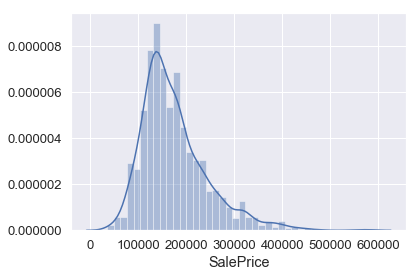

In [294]:
# Visualise the target variable beore before transforming
sns.distplot(housing_data['SalePrice'])

#skewness
print('Skewness in the sale price')
print(housing_data['SalePrice'].skew().round(3))

Skewness in the sale price
-0.01


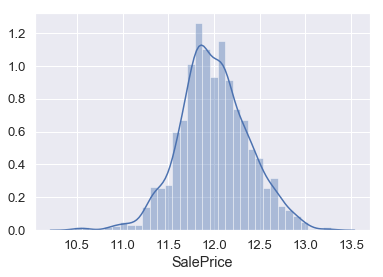

In [295]:
# Transforming the target variable, SalePrice

housing_data['SalePrice'] = np.log(housing_data["SalePrice"])


# Visualise the target variable beore before transforming

sns.distplot(housing_data['SalePrice'])


#skewness

print('Skewness in the sale price')
print(housing_data['SalePrice'].skew().round(3))

#### Split in Train Test DataSet and Rescaling
Test-Train Split

In [296]:
## Using sklearn library splitting the data into train and test data in 70:30 ratio

np.random.seed(0)
df_train, df_test = train_test_split(housing_data,train_size=0.7,random_state=100)

print("Shape of train dataframe is "+str(df_train.shape)+"\n")
print("Shape of test dataframe is "+str(df_test.shape)+"\n")

Shape of train dataframe is (964, 140)

Shape of test dataframe is (414, 140)



#### Rescaling 
Rescalling the numerical columns using MinMaxScaler

In [297]:
# Scaling only the numeric variables. We don't need to scale the binary variables as they are already scaled into 0 and 1
# Numeric columns list
numeric_cols = list(df_train.select_dtypes(include=['int64', 'float64']).columns)

# Instantiate the scaler
scaler = MinMaxScaler()


# Fit the data into scaler and transform

df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])
df_train.head()

,LotFrontage,LotArea,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,AgeHouse,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
192,0.160959,0.214973,0.428571,0.000000,0.666667,0.8,0.75,1.000000,0.325392,0.426543,0.688974,1.0,0.569870,0.000000,0.347262,0.333333,0.666667,0.0,0.375,0.666667,0.000000,0.0,1.000000,0.50,0.000000,0.127737,0.603914,0.073529,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
109,0.287671,0.293067,0.571429,0.656635,0.333333,0.8,0.25,0.666667,0.409646,0.557786,0.887819,1.0,0.784416,0.000000,0.477999,0.000000,0.666667,0.0,0.375,0.333333,0.333333,0.6,0.666667,0.50,0.000000,0.445255,0.600179,0.242647,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1300,0.164384,0.264818,0.428571,0.470588,0.666667,0.8,0.25,1.000000,0.403254,0.139079,0.470871,1.0,0.348571,0.537954,0.522001,0.000000,0.666667,0.5,0.375,0.666667,0.333333,0.6,1.000000,0.50,0.000000,0.000000,0.660480,0.073529,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1333,0.133562,0.163072,0.571429,0.000000,0.333333,0.6,0.25,0.166667,0.000000,0.393242,0.386615,1.0,0.243636,0.306381,0.324786,0.000000,0.333333,0.5,0.250,0.666667,0.000000,0.0,0.333333,0.25,0.000000,0.237226,0.452271,0.500000,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

#### Selecting independent and dependent  variables

In [298]:
# Popping out the SalePrice column for y_train
y_train = df_train.pop('SalePrice').astype(float)

# Creating X_train
X_train = df_train.astype(float)

In [299]:
X_train.shape

(964, 139)

In [300]:
# Scale the test set variables with min-max scaler
# We don't fit scaler on the test set. We only transform the test set.
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols]) 
df_test.head()

,LotFrontage,LotArea,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,AgeHouse,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
144,0.167808,0.217344,0.428571,0.459644,0.333333,0.6,0.25,0.500000,0.773969,0.193928,0.831969,0.50,0.724156,0.000000,0.441279,0.333333,0.666667,0.0,0.750,0.333333,0.000000,0.0,0.333333,0.50,0.000000,0.000000,0.450847,0.316176,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
30,0.099315,0.200206,0.285714,0.000000,0.333333,0.6,0.25,0.166667,0.000000,0.317826,0.312470,0.50,0.163636,0.367437,0.311174,0.000000,0.333333,0.0,0.375,0.333333,0.000000,0.0,0.333333,0.25,0.000000,0.197080,0.044469,0.647059,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
606,0.208904,0.313434,0.428571,0.000000,0.333333,0.8,0.25,1.000000,0.425334,0.150833,0.500722,0.75,0.366753,0.000000,0.223488,0.333333,0.333333,0.0,0.375,0.666667,0.000000,0.0,0.333333,0.50,0.352941,0.000000,0.520595,0.095588,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1346,0.164384,0.551001,0.714286,0.000000,0.333333,0.6,0.25,0.666667,0.172574,0.589128,0.754935,0.50,0.946494,0.000000,0.576765,0.000000,0.666667,0.0,0.375,0.333333,0.333333,0.8,0.666667,0.50,0.000000,0.291971,0.715458,0.279412,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,

In [301]:
# popping out the SalePrice column to create y_test
y_test = df_test.pop('SalePrice')
# Creating X_test
X_test = df_test

## Model Building

### Using RFE to select top features
As the number of independent variables are high in the X_train, using Recursive Feature Elimination (RFE) for the selecting top  20, 25, and 30 features to determine which among these is best to go with

In [302]:
# Checking top 20 features

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

# Columns selected by RFE and their weights

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

## Columns selected by RFE. We will start with these columns for manual elimination

RFE_cols_20 = X_train.columns[rfe.support_]
RFE_cols_20

Index(['LotFrontage', 'OverallCond', 'ExterQual', 'BsmtFinSF1', 'TotalBsmtSF',
       'GrLivArea', 'GarageCars', 'AgeHouse', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor',
       'Neighborhood_StoneBr', 'RoofStyle_Shed', 'Exterior1st_Stucco',
       'Exterior2nd_Stucco', 'Foundation_Wood', 'MSSubClass_160',
       'BldgType_Duplex'],
      dtype='object')

In [303]:
# Checking top 25 features

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 25)             # running RFE
rfe = rfe.fit(X_train, y_train)

# Columns selected by RFE and their weights

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

## Columns selected by RFE. We will start with these columns for manual elimination

RFE_cols_25 = X_train.columns[rfe.support_]
RFE_cols_25

Index(['LotFrontage', 'LotArea', 'OverallCond', 'ExterQual', 'BsmtFinSF1',
       'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'AgeHouse', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor',
       'Neighborhood_StoneBr', 'RoofStyle_Shed', 'Exterior1st_BrkFace',
       'Exterior1st_Stucco', 'Exterior2nd_Brk Cmn', 'Exterior2nd_Stucco',
       'MasVnrType_BrkFace', 'MasVnrType_Stone', 'Foundation_Wood',
       'MSSubClass_160', 'BldgType_Duplex'],
      dtype='object')

In [304]:
# Checking top 30 features

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

# Columns selected by RFE and their weights

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

## Columns selected by RFE. We will start with these columns for manual elimination

RFE_cols_30 = X_train.columns[rfe.support_]
RFE_cols_30

Index(['LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea', 'ExterQual',
       'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'AgeHouse',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr',
       'RoofStyle_Shed', 'Exterior1st_BrkFace', 'Exterior1st_Stucco',
       'Exterior1st_WdShing', 'Exterior2nd_Brk Cmn', 'Exterior2nd_Stucco',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'Foundation_Stone', 'Foundation_Wood', 'MSSubClass_160',
       'BldgType_Duplex'],
      dtype='object')

#### Using the training data and list of features, create the statistical summary of the models 
#### To check adjusted R-square value for top 20, 25 and 30 features

In [305]:
X_train_rfe = X_train[RFE_cols_20]
X_test_rfe = X_test[RFE_cols_20]

X_train_sm = sm.add_constant(X_train_rfe)
X_test_sm = sm.add_constant(X_test_rfe)

lr = sm.OLS(y_train,X_train_sm)    # Ordinary Least-Squares
lr_model =  lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     394.0
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:02:30   Log-Likelihood:                 1633.0
No. Observations:                 964   AIC:                            -3224.
Df Residuals:                     943   BIC:                            -3122.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1082      0.021      5.133      0.000       0.067       0.150
LotFrontage              0.0682      0.024      2.799      0.005       0.020       0.116
OverallCond              0.1499      0.010     14.369      0.000       0.129       0.170
ExterQual                0.0947      0.011      8.265      0.000       0.072       0.117
BsmtFinSF1               0.0654      0.007      9.482      0.000       0.052       0.079
TotalBsmtSF              0.1172      0.010     11.517      0.000       0.097       0.137
GrLivArea                0.3974      0.012     32.587      0.000       0.373       0.421
GarageCars               0.1115      0.010     10.656      0.000       0.091       0.132
AgeHouse                -0.1897      0.011    -17.230      0.000      -0.211      -0.168
MSZoning_FV              0.1276      0.021      6.223      0.000       0.087       0.168
MSZoning_RH              0.0861      0.023      3.764      0.000       0.041       0.131
MSZoning_RL              0.0917      0.019      4.824      0.000       0.054       0.129
MSZoning_RM              0.0804      0.019      4.199      0.000       0.043       0.118
Neighborhood_Crawfor     0.0651      0.008      7.747      0.000       0.049       0.082
Neighborhood_StoneBr     0.0435      0.013      3.359      0.001       0.018       0.069
RoofStyle_Shed          -0.0559      0.046     -1.221      0.223      -0.146       0.034
Exterior1st_Stucco       0.0609      0.016      3.814      0.000       0.030       0.092
Exterior2nd_Stucco      -0.0525      0.017     -3.153      0.002      -0.085      -0.020
Foundation_Wood         -0.0758      0.032     -2.356      0.019      -0.139      -0.013
MSSubClass_160          -0.0480      0.008     -5.829      0.000      -0.064      -0.032
BldgType_Duplex         -0.0481      0.008     -6.168      0.000      -0.063      -0.033
==============================================================================
Omnibus:                      189.443   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              729.636
Skew:                          -0.890   Prob(JB):                    3.64e-159
Kurtosis:                       6.873   Cond. No.                         53.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [306]:
X_train_rfe = X_train[RFE_cols_25]
X_test_rfe = X_test[RFE_cols_25]

X_train_sm = sm.add_constant(X_train_rfe)
X_test_sm = sm.add_constant(X_test_rfe)

lr = sm.OLS(y_train,X_train_sm)    # Ordinary Least-Squares
lr_model =  lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     331.9
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:02:30   Log-Likelihood:                 1657.6
No. Observations:                 964   AIC:                            -3263.
Df Residuals:                     938   BIC:                            -3137.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1151      0.021      5.570      0.000       0.075       0.156
LotFrontage              0.0488      0.025      1.934      0.053      -0.001       0.098
LotArea                  0.0480      0.017      2.873      0.004       0.015       0.081
OverallCond              0.1539      0.010     15.062      0.000       0.134       0.174
ExterQual                0.0891      0.012      7.719      0.000       0.066       0.112
BsmtFinSF1               0.0622      0.007      9.174      0.000       0.049       0.075
TotalBsmtSF              0.1061      0.010     10.476      0.000       0.086       0.126
GrLivArea                0.3904      0.012     31.672      0.000       0.366       0.415
GarageCars               0.1016      0.010      9.771      0.000       0.081       0.122
AgeHouse                -0.1959      0.011    -17.771      0.000      -0.218      -0.174
MSZoning_FV              0.1274      0.020      6.350      0.000       0.088       0.167
MSZoning_RH              0.0846      0.022      3.782      0.000       0.041       0.128
MSZoning_RL              0.0858      0.019      4.608      0.000       0.049       0.122
MSZoning_RM              0.0794      0.019      4.245      0.000       0.043       0.116
Neighborhood_Crawfor     0.0600      0.008      7.252      0.000       0.044       0.076
Neighborhood_StoneBr     0.0563      0.013      4.358      0.000       0.031       0.082
RoofStyle_Shed          -0.0556      0.045     -1.238      0.216      -0.144       0.033
Exterior1st_BrkFace      0.0404      0.008      4.808      0.000       0.024       0.057
Exterior1st_Stucco       0.0640      0.016      4.098      0.000       0.033       0.095
Exterior2nd_Brk Cmn      0.0399      0.023      1.729      0.084      -0.005       0.085
Exterior2nd_Stucco      -0.0494      0.016     -3.033      0.002      -0.081      -0.017
MasVnrType_BrkFace       0.0056      0.004      1.555      0.120      -0.001       0.013
MasVnrType_Stone         0.0255      0.006      4.431      0.000       0.014       0.037
Foundation_Wood         -0.0725      0.031     -2.302      0.022      -0.134      -0.011
MSSubClass_160          -0.0523      0.008     -6.199      0.000      -0.069      -0.036
BldgType_Duplex         -0.0503      0.008     -6.571      0.000      -0.065      -0.035
==============================================================================
Omnibus:                      217.978   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              925.624
Skew:                          -0.998   Prob(JB):                    1.01e-201
Kurtosis:                       7.366   Cond. No.                         55.5
==============================================================================

Warnings:
[1] Standard Erro

In [307]:
X_train_rfe = X_train[RFE_cols_30]
X_test_rfe = X_test[RFE_cols_30]

X_train_sm = sm.add_constant(X_train_rfe)
X_test_sm = sm.add_constant(X_test_rfe)

lr = sm.OLS(y_train,X_train_sm)    # Ordinary Least-Squares
lr_model =  lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     280.3
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:02:30   Log-Likelihood:                 1665.6
No. Observations:                 964   AIC:                            -3269.
Df Residuals:                     933   BIC:                            -3118.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0752      0.024      3.085      0.002       0.027       0.123
LotFrontage              0.0475      0.025      1.887      0.060      -0.002       0.097
LotArea                  0.0500      0.017      3.001      0.003       0.017       0.083
OverallCond              0.1525      0.010     14.864      0.000       0.132       0.173
MasVnrArea               0.0252      0.012      2.112      0.035       0.002       0.049
ExterQual                0.0861      0.012      7.404      0.000       0.063       0.109
BsmtFinSF1               0.0608      0.007      8.967      0.000       0.048       0.074
TotalBsmtSF              0.1081      0.010     10.684      0.000       0.088       0.128
GrLivArea                0.3869      0.012     31.128      0.000       0.363       0.411
GarageCars               0.1013      0.010      9.779      0.000       0.081       0.122
AgeHouse                -0.1969      0.011    -17.812      0.000      -0.219      -0.175
MSZoning_FV              0.1336      0.020      6.561      0.000       0.094       0.174
MSZoning_RH              0.0876      0.023      3.889      0.000       0.043       0.132
MSZoning_RL              0.0895      0.019      4.740      0.000       0.052       0.127
MSZoning_RM              0.0818      0.019      4.313      0.000       0.045       0.119
Neighborhood_BrDale      0.0251      0.017      1.488      0.137      -0.008       0.058
Neighborhood_Crawfor     0.0594      0.008      7.207      0.000       0.043       0.076
Neighborhood_StoneBr     0.0571      0.013      4.444      0.000       0.032       0.082
RoofStyle_Shed          -0.0549      0.045     -1.230      0.219      -0.143       0.033
Exterior1st_BrkFace      0.0400      0.008      4.788      0.000       0.024       0.056
Exterior1st_Stucco       0.0650      0.016      4.172      0.000       0.034       0.096
Exterior1st_WdShing      0.0102      0.010      1.011      0.312      -0.010       0.030
Exterior2nd_Brk Cmn      0.0442      0.023      1.909      0.057      -0.001       0.090
Exterior2nd_Stucco      -0.0506      0.016     -3.111      0.002      -0.082      -0.019
MasVnrType_BrkFace       0.0366      0.013      2.897      0.004       0.012       0.061
MasVnrType_None          0.0397      0.013      3.055      0.002       0.014       0.065
MasVnrType_Stone         0.0581      0.013      4.330      0.000       0.032       0.084
Foundation_Stone         0.0134      0.021      0.649      0.517      -0.027       0.054
Foundation_Wood         -0.0724      0.031     -2.312      0.021      -0.134      -0.011
MSSubClass_160          -0.0591      0.009     -6.319      0.000      -0.078      -0.041
BldgType_Duplex         -0.0516      0.008     -6.766      0.000      -0.067      -0.037
=========================================================

By inspecting adjusted R-square value of linear regression model with top 20, top 25 and top 30 features, top 25 features seem to be optimum as models have R-squared of 89.8 and adjusted R-squared of 89.6 on the training data.

In [308]:
X_train_rfe = X_train[RFE_cols_25]
X_test_rfe = X_test[RFE_cols_25]

In [309]:
X_train_sm = sm.add_constant(X_train_rfe)

X_test_sm = sm.add_constant(X_test_rfe)

lr = sm.OLS(y_train,X_train_sm)    # Ordinary Least-Squares
lr_model =  lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     331.9
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:02:31   Log-Likelihood:                 1657.6
No. Observations:                 964   AIC:                            -3263.
Df Residuals:                     938   BIC:                            -3137.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1151      0.021      5.570      0.000       0.075       0.156
LotFrontage              0.0488      0.025      1.934      0.053      -0.001       0.098
LotArea                  0.0480      0.017      2.873      0.004       0.015       0.081
OverallCond              0.1539      0.010     15.062      0.000       0.134       0.174
ExterQual                0.0891      0.012      7.719      0.000       0.066       0.112
BsmtFinSF1               0.0622      0.007      9.174      0.000       0.049       0.075
TotalBsmtSF              0.1061      0.010     10.476      0.000       0.086       0.126
GrLivArea                0.3904      0.012     31.672      0.000       0.366       0.415
GarageCars               0.1016      0.010      9.771      0.000       0.081       0.122
AgeHouse                -0.1959      0.011    -17.771      0.000      -0.218      -0.174
MSZoning_FV              0.1274      0.020      6.350      0.000       0.088       0.167
MSZoning_RH              0.0846      0.022      3.782      0.000       0.041       0.128
MSZoning_RL              0.0858      0.019      4.608      0.000       0.049       0.122
MSZoning_RM              0.0794      0.019      4.245      0.000       0.043       0.116
Neighborhood_Crawfor     0.0600      0.008      7.252      0.000       0.044       0.076
Neighborhood_StoneBr     0.0563      0.013      4.358      0.000       0.031       0.082
RoofStyle_Shed          -0.0556      0.045     -1.238      0.216      -0.144       0.033
Exterior1st_BrkFace      0.0404      0.008      4.808      0.000       0.024       0.057
Exterior1st_Stucco       0.0640      0.016      4.098      0.000       0.033       0.095
Exterior2nd_Brk Cmn      0.0399      0.023      1.729      0.084      -0.005       0.085
Exterior2nd_Stucco      -0.0494      0.016     -3.033      0.002      -0.081      -0.017
MasVnrType_BrkFace       0.0056      0.004      1.555      0.120      -0.001       0.013
MasVnrType_Stone         0.0255      0.006      4.431      0.000       0.014       0.037
Foundation_Wood         -0.0725      0.031     -2.302      0.022      -0.134      -0.011
MSSubClass_160          -0.0523      0.008     -6.199      0.000      -0.069      -0.036
BldgType_Duplex         -0.0503      0.008     -6.571      0.000      -0.065      -0.035
==============================================================================
Omnibus:                      217.978   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              925.624
Skew:                          -0.998   Prob(JB):                    1.01e-201
Kurtosis:                       7.366   Cond. No.                         55.5
==============================================================================

Warnings:
[1] Standard Erro

In [310]:
### Parameters of the models
lr_model.params

const                   0.115075
LotFrontage             0.048776
LotArea                 0.048048
OverallCond             0.153948
ExterQual               0.089097
BsmtFinSF1              0.062194
TotalBsmtSF             0.106070
GrLivArea               0.390365
GarageCars              0.101610
AgeHouse               -0.195893
MSZoning_FV             0.127427
MSZoning_RH             0.084551
MSZoning_RL             0.085796
MSZoning_RM             0.079445
Neighborhood_Crawfor    0.059991
Neighborhood_StoneBr    0.056289
RoofStyle_Shed         -0.055558
Exterior1st_BrkFace     0.040355
Exterior1st_Stucco      0.063981
Exterior2nd_Brk Cmn     0.039875
Exterior2nd_Stucco     -0.049414
MasVnrType_BrkFace      0.005594
MasVnrType_Stone        0.025483
Foundation_Wood        -0.072490
MSSubClass_160         -0.052343
BldgType_Duplex        -0.050289
dtype: float64

In [311]:
y_train_pred = lr_model.predict(X_train_sm)

# Making predictions using the final model
y_test_pred = lr_model.predict(X_test_sm)

In [312]:
# Model Evaluation

print("Linear Regression with 25 features")
print("===================================")
print('R2 score (train) : ',r2_score(y_train,y_train_pred))
print('R2 score (test) : ',r2_score(y_test,y_test_pred))
print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Linear Regression with 25 features
R2 score (train) :  0.8984480839251112
R2 score (test) :  0.871837710454036
RMSE (train) :  0.04335096110867513
RMSE (test) :  0.04752049368642573


### Residual Analysis of the train data
Plot the histogram of the error terms , to check if the error terms are normally distributed (which is, one of the assumptions of linear regression)

Text(0.5,0,'res')

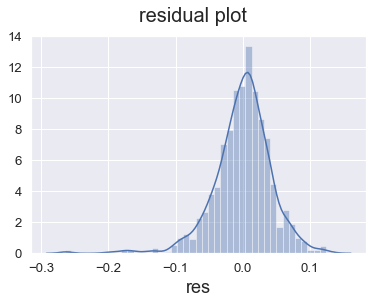

In [313]:
res = y_train - y_train_pred
fig = plt.figure()
sns.distplot(res)
fig.suptitle('residual plot', fontsize = 20)              # Plot heading 
plt.xlabel('res', fontsize = 18) 

Text(0,0.5,'res')

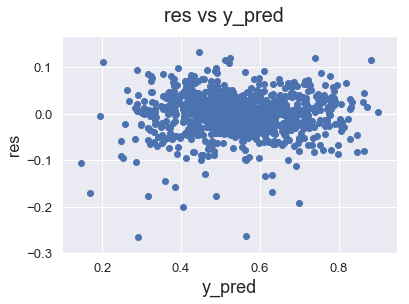

In [314]:
fig = plt.figure()
plt.scatter(y_train_pred,res)
fig.suptitle('res vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_pred', fontsize = 18)              # X-label
plt.ylabel('res', fontsize = 16) 

Text(0,0.5,'y_pred')

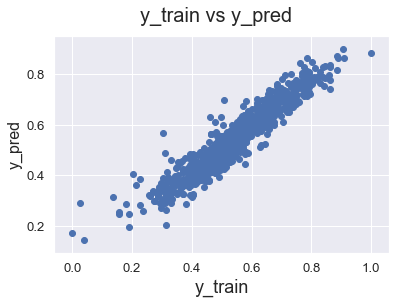

In [315]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)              # X-label
plt.ylabel('y_pred', fontsize = 16) 

## Ridge Regression

In [316]:
# Specify the range of hyperparameters (alpha)
params = {'alpha': [0.0001, 0.001, 0.01, 0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0 ]}

# Instantiate Ridge regression
ridge = Ridge()

In [317]:
# Cross validation with 5 folds scoring='r2',
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
# Fitting the model with train set
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [318]:
# creating dataframe with model_ridge results
ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009566,0.015659,0.000200,0.000399,0.0001,{'alpha': 0.0001},-0.030678,-0.030662,-0.032029,-0.034045,-0.035798,-0.032639,0.002003,14,-0.031841,-0.031639,-0.031131,-0.031015,-0.030380,-0.031201,0.000513
1,0.001589,0.000795,0.000199,0.000399,0.001,{'alpha': 0.001},-0.030676,-0.030663,-0.032027,-0.034045,-0.035799,-0.032638,0.002003,13,-0.031841,-0.031639,-0.031131,-0.031015,-0.030380,-0.031201,0.000513
2,0.001795,0.000399,0.000200,0.000399,0.01,{'alpha': 0.01},-0.030657,-0.030667,-0.032005,-0.034044,-0.035800,-0.032631,0.002008,12,-0.031841,-0.031638,-0.031129,-0.031016,-0.030380,-0.031201,0.000513
3,0.001993,0.000629,0.000199,0.000399,0.1,{'alpha': 0.1},-0.030484,-0.030710,-0.031810,-0.034037,-0.035811,-0.032567,0.002050,10,-0.031843,-0.031633,-0.031130,-0.031024,-0.030379,-0.031202,0.000512
4,0.001595,0.000489,0.000200,0.000399,0.2,{'alpha': 0.2},-0.030315,-0.030750,-0.031633,-0.034030,-0.035830,-0.032508,0.002097,9,-0.031846,-0.031642,-0.031159,-0.031031,-0.030379,-0.031211,0.000513
5,0.001795,0.000746,0.000599,0.000489,0.3,{'alpha': 0.3},-0.030166,-0.030785,-0.031491,-0.034024,-0.035852,-0.032460,0.002141,8,-0.031861,-0.031656,-0.031188,-0.031043,-0.030377,-0.031225,0.000518
6,0.002993,0.000632,0.000399,0.000488,0.4,{'alpha': 0.4},-0.030032,-0.030816,-0.031395,-0.034019,-0.035873,-0.032423,0.002180,7,-0.031876,-0.031670,-0.031217,-0.031055,-0.030378,-0.031239,0.000523
7,0.002594,0.000488,0.000000,0.000000,0.5,{'alpha': 0.5},-0.029911,-0.030844,-0.031322,-0.034018,-0.035895,-0.032394,0.002217,6,-0.031890,-0.031686,-0.031248,-0.031074,-0.030385,-0.031257,0.000525
8,0.001801,0.000402,0.000597,0.000487,0.6,{'alpha': 0.6},-0.029801,-0.030870,-0.031314,-0.034015,-0.035916,-0.032379,0.002245,5,-0.031908,-0.031708,-0.031276,-0.031100,-0.030397,-0.031278,0.000527
9,0.001388,0.000481,0.000400,0.000489,0.7,{'alpha': 0.7},-0.029698,-0.030894,-0.031323,-0.034012,-0.035940,-0.032370,0.002272,4,-0.031929,-0.031732,-0.031302,-0.031126,-0.030412,-0.031300,0.000529


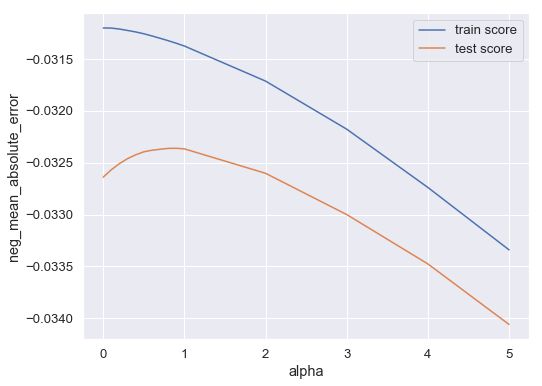

In [319]:
# Plotting mean of Train score
plt.figure(figsize=(8,6))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
# Plotting mean of the Test score
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('neg_mean_absolute_error')
plt.show()

In [320]:
alpha = model_cv.best_params_["alpha"]
print("Optimum alpha for Ridge is %f" %(alpha))

Optimum alpha for Ridge is 0.900000


In [321]:
# Instantiate Ridge regression with alpha=0.9
model_ridge = Ridge(alpha=alpha)
# Fitting the model with the train set
model_ridge.fit(X_train_rfe, y_train)

Ridge(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [322]:
y_train_pred = model_ridge.predict(X_train_rfe)

y_test_pred = model_ridge.predict(X_test_rfe)

In [323]:
# Model Evaluation

print("Ridge Regression with 25 features and alpha = ",alpha)
print("===================================================")
print('R2 score (train) : ',r2_score(y_train,y_train_pred))
print('R2 score (test) : ',r2_score(y_test,y_test_pred))
print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))



Ridge Regression with 25 features and alpha =  0.9
R2 score (train) :  0.8973718121708262
R2 score (test) :  0.8708851708375369
RMSE (train) :  0.04358007763300673
RMSE (test) :  0.04769675988038313


In [324]:
model_coefficients = pd.DataFrame(index=X_train_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge'] = model_ridge.coef_
print("Number of features in ridge regression",len(model_coefficients))
model_coefficients.sort_values(['Ridge'],ascending = False)

Number of features in ridge regression 25


,Ridge
GrLivArea,0.368888
OverallCond,0.147458
TotalBsmtSF,0.106846
GarageCars,0.105562
ExterQual,0.097736
MSZoning_FV,0.092379
BsmtFinSF1,0.062012
Neighborhood_Crawfor,0.059113
Exterior1st_Stucco,0.054281
MSZoning_RL,0.053433


## Lasso Regression

In [325]:
# Specify the range of hyperparameters (alpha)
params = {'alpha': [0.00001,0.00001,0.0001,0.001, 0.01, 1.0, 2, 3, 4, 5]}

# Instantiate Lasso regression
lasso = Lasso()

In [326]:
# Cross validation with 5 folds
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
# Fitting the model with train set
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-05, 1e-05, 0.0001, 0.001, 0.01, 1.0, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [327]:
 # creating dataframe with model_cv results
lasso_results = pd.DataFrame(model_cv.cv_results_)
lasso_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006381,0.001196,0.000798,0.000399,1e-05,{'alpha': 1e-05},-0.030491,-0.030719,-0.031903,-0.034123,-0.035832,-0.032610,0.002059,2,-0.031860,-0.031639,-0.031119,-0.031033,-0.030392,-0.031208,0.000513
1,0.004993,0.000893,0.000000,0.000000,1e-05,{'alpha': 1e-05},-0.030491,-0.030719,-0.031903,-0.034123,-0.035832,-0.032610,0.002059,2,-0.031860,-0.031639,-0.031119,-0.031033,-0.030392,-0.031208,0.000513
2,0.002593,0.000489,0.000199,0.000399,0.0001,{'alpha': 0.0001},-0.029711,-0.031202,-0.031463,-0.034521,-0.035784,-0.032533,0.002253,1,-0.032211,-0.031870,-0.031369,-0.031384,-0.030563,-0.031479,0.000556
3,0.001795,0.000399,0.000199,0.000399,0.001,{'alpha': 0.001},-0.030543,-0.033376,-0.035897,-0.035985,-0.040246,-0.035204,0.003209,4,-0.035314,-0.035192,-0.034376,-0.033971,-0.034040,-0.034578,0.000569
4,0.001396,0.000489,0.000199,0.000399,0.01,{'alpha': 0.01},-0.062456,-0.072305,-0.079802,-0.079350,-0.078254,-0.074430,0.006568,5,-0.073372,-0.073474,-0.073633,-0.075741,-0.073050,-0.073854,0.000963
5,0.001395,0.000487,0.000400,0.000490,1,{'alpha': 1.0},-0.098012,-0.103518,-0.111688,-0.113683,-0.107136,-0.106807,0.005649,6,-0.108800,-0.107496,-0.105413,-0.104904,-0.106865,-0.106696,0.001411
6,0.001396,0.000489,0.000199,0.000399,2,{'alpha': 2},-0.098012,-0.103518,-0.111688,-0.113683,-0.107136,-0.106807,0.005649,6,-0.108800,-0.107496,-0.105413,-0.104904,-0.106865,-0.106696,0.001411
7,0.001602,0.000494,0.000200,0.000399,3,{'alpha': 3},-0.098012,-0.103518,-0.111688,-0.113683,-0.107136,-0.106807,0.005649,6,-0.108800,-0.107496,-0.105413,-0.104904,-0.106865,-0.106696,0.001411
8,0.001994,0.000002,0.000599,0.000489,4,{'alpha': 4},-0.098012,-0.103518,-0.111688,-0.113683,-0.107136,-0.106807,0.005649,6,-0.108800,-0.107496,-0.105413,-0.104904,-0.106865,-0.106696,0.001411
9,0.001590,0.000803,0.000399,0.000489,5,{'alpha': 5},-0.098012,-0.103518,-0.111688,-0.113683,-0.107136,-0.106807,0.005649,6,-0.108800,-0.107496,-0.105413,-0.104904,-0.106865,-0.106696,0.001411


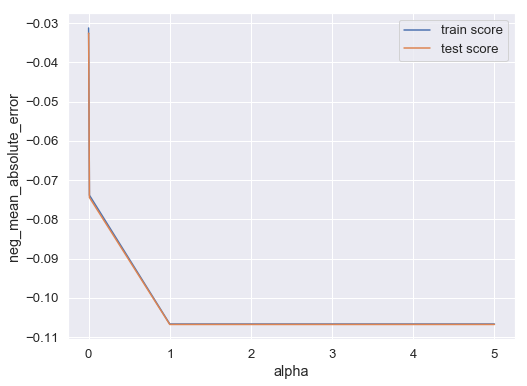

In [328]:
# Plotting mean of Train score
plt.figure(figsize=(8,6))
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
# Plotting mean of the Test score
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])

plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('neg_mean_absolute_error')
plt.show()

In [329]:
alpha = model_cv.best_params_["alpha"]
print("Optimum alpha for Lasso is %f" %(alpha))

Optimum alpha for Lasso is 0.000100


In [330]:
# Instantiate Lasso regression with alpha=0.0001
model_lasso = Lasso(alpha)
# Fitting the model with the train set
model_lasso.fit(X_train_rfe, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [331]:
y_train_pred = model_lasso.predict(X_train_rfe)

y_test_pred = model_lasso.predict(X_test_rfe)

In [332]:
# Model Evaluation

NumFeatures = len(model_lasso.coef_[model_lasso.coef_ != 0])

print("Lasso Regression with {0} features and aplha {1}".format(NumFeatures, alpha))
print("====================================================")
print('R2 score (train) : ',r2_score(y_train,y_train_pred))
print('R2 score (test) : ',r2_score(y_test,y_test_pred))
print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Lasso Regression with 24 features and aplha 0.0001
R2 score (train) :  0.8957310720044349
R2 score (test) :  0.8708247308311595
RMSE (train) :  0.04392705861947114
RMSE (test) :  0.047707922251129534


In [333]:
print("Number of features in Lasso regression",NumFeatures)

model_coefficients = pd.DataFrame(index=X_train_rfe.columns)
model_coefficients.rows = X_test_rfe.columns


model_coefficients['Lasso'] = model_lasso.coef_
model_coefficients[model_coefficients.Lasso != 0].sort_values(['Lasso'],ascending = False)

Number of features in Lasso regression 24


,Lasso
GrLivArea,0.391043
OverallCond,0.153862
TotalBsmtSF,0.107212
GarageCars,0.101704
ExterQual,0.092304
BsmtFinSF1,0.061205
MSZoning_FV,0.057183
Neighborhood_Crawfor,0.056851
Neighborhood_StoneBr,0.045024
Exterior1st_Stucco,0.041625


### Comparing Model Coefficients

In [334]:
model_coefficients = pd.DataFrame(index=X_train_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge with optimum alpha'] = model_ridge.coef_
model_coefficients['Lasso with optimum alpha'] = model_lasso.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge with optimum alpha,Lasso with optimum alpha
LotFrontage,0.043220,0.019936
LotArea,0.050658,0.040597
OverallCond,0.147458,0.153862
ExterQual,0.097736,0.092304
BsmtFinSF1,0.062012,0.061205
TotalBsmtSF,0.106846,0.107212
GrLivArea,0.368888,0.391043
GarageCars,0.105562,0.101704
AgeHouse,-0.186454,-0.194656
MSZoning_FV,0.092379,0.057183


## Observation

#### Final Model 

Lasso Regression and Ridge Regression gave similar R2-score and similar RMSE score. However the Lasso gave this R2-score with 24 features whereas Ridge gave the same R2-score with 25 features. Thus LASSO is chosen as the final model.

In [335]:
# 10 features ordered by feature importance in Lasso Regression

model_coefficients.sort_values(by=['Lasso with optimum alpha'], ascending=False).head(10)

,Ridge with optimum alpha,Lasso with optimum alpha
GrLivArea,0.368888,0.391043
OverallCond,0.147458,0.153862
TotalBsmtSF,0.106846,0.107212
GarageCars,0.105562,0.101704
ExterQual,0.097736,0.092304
BsmtFinSF1,0.062012,0.061205
MSZoning_FV,0.092379,0.057183
Neighborhood_Crawfor,0.059113,0.056851
Neighborhood_StoneBr,0.052386,0.045024
Exterior1st_Stucco,0.054281,0.041625


#### Summary

* 25 features are selected so to have complex enough model so as to observe some significant impact of regularisation .


* Top 25 features selected through RFE  are 'LotFrontage', 'LotArea', 'OverallCond', 'ExterQual', 'BsmtFinSF1',     'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'AgeHouse', 'MSZoning_FV','MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor','Neighborhood_StoneBr', 'RoofStyle_Shed', 'Exterior1st_BrkFace','Exterior1st_Stucco','Exterior2nd_Brk Cmn', 'Exterior2nd_Stucco','MasVnrType_BrkFace', 'MasVnrType_Stone', 'Foundation_Wood','MSSubClass_160', 'BldgType_Duplex'


* Ridge and Lasso Regression Model are built with optimum alpha calculated in GridSearchCV method. Optimum alpha values:
       * Ridge = 0.9                    R2(test) = 87.0                RMSE(test) = 0.047
       * Lasso = 0.0001                 R2(test) = 87.0                RMSE(test) = 0.047

* Ridge and Lasso Regression have similar R2-scores and RMSE on test data. We choose Lasso  as it does feature selection 

* Top 10 features ordered by feature importance in Lasso Regression 
        GrLivArea
        OverallCond
        TotalBsmtSF
        GarageCars
        ExterQual
        BsmtFinSF1
        MSZoning_FV
        Neighborhood_Crawfor
        Neighborhood_StoneBr
        Exterior1st_Stucco
* Hence based on Lasso, the factors that generally affect the price are the Zoning classification, Living area square feet, Overall quality and condition of the house ,number of cars that can be accomodated in the garage, Total basement area in square feet and the Basement finished square feet area